# <center> Customer Churn Prediction — EDA</center>

This notebook analyzes data from a telecommunications company to identify patterns in customer churn (`Churn`).

We will examine demographic and behavioral attributes to understand: **who is churning and why**.

**Target variable:** `Churn`
Problem type: **binary classification**

## 🔍 Objective:
Build a classification model that predicts whether a customer will churn (`Churn = Yes`) or not (`Churn = No`).

In [538]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set default plot style
sns.set_style("whitegrid")
sns.set_palette(["#d38b8b", "#b0cde6"])  

In [539]:
#  Load dataset

df = pd.read_csv('../data/churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 📋 Data overview

Let's take a look at the structure and types of the data.


In [540]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


💡 **Note**:  
Most features are stored as `object`, even numerical-looking fields like `TotalCharges`.  

Some values in `TotalCharges` were strings, possibly due to spaces. We'll need to convert them to `float` and remove lines with missing ones.

In [541]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows where TotalCharges couldn't be converted
print("Missing values in TotalCharges:", df['TotalCharges'].isna().sum())
df = df.dropna(subset=['TotalCharges'])

# Reset index after drop
df.reset_index(drop=True, inplace=True)

Missing values in TotalCharges: 11


<u>Now the dataset is clean and ready for analysis.</u>

Let's look at summary statistics. 

In [542]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## 📊 Summary Statistics

- `SeniorCitizen` is binary (0 = not senior, 1 = senior)
- `tenure` ranges from 1 to 72 months
- `MonthlyCharges` range from \$18.25 to \$118.75
- `TotalCharges` correlates with `tenure` × `MonthlyCharges`

The typical customer has been with the company **~32 months**, pays around **\$65/month**, and has spent about **\$2,200** in total.


## Missing values check
We ensure there are no remaining missing values before proceeding.


In [543]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

 <u>No missing values detected. Dataset is ready for EDA. </u>

## 🎯 Target Variable Distribution

Let's check the balance of our target variable: **Churn**.


In [544]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

We have:
- `No` churn: 5,174 customers
- `Yes` churn: 1,869 customers

That’s ~26.6% churn rate, indicating a **moderately imbalanced dataset**.
We'll keep this in mind during model training and evaluation.


## Churn by Gender

Let's examine the distribution of churn by gender.


In [545]:
df[['Churn', 'gender']].value_counts().unstack()

gender,Female,Male
Churn,,
No,2544,2619
Yes,939,930


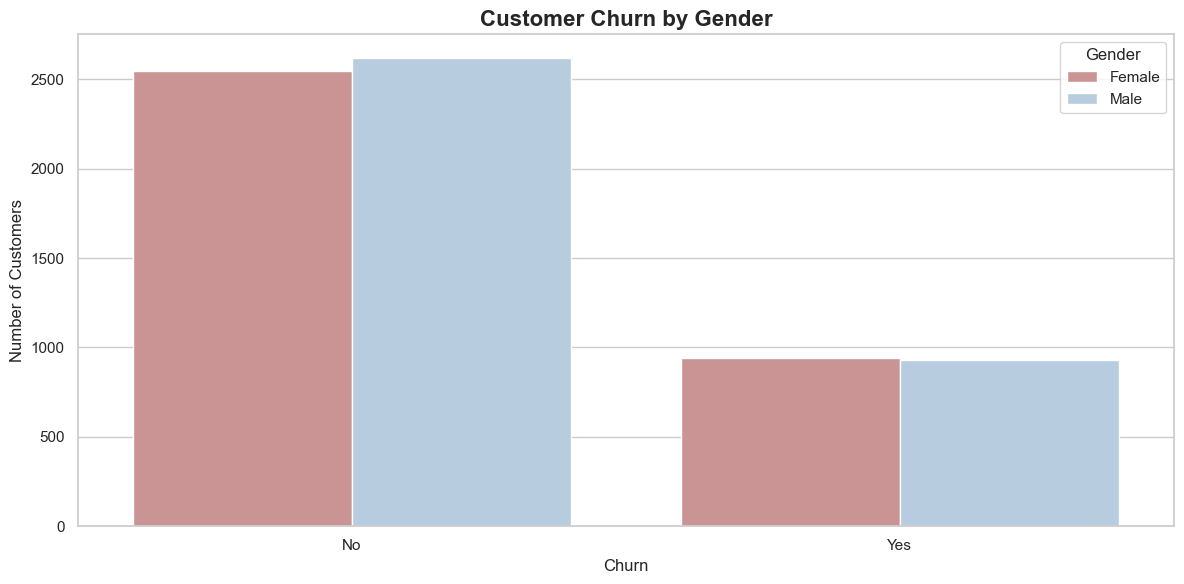

In [546]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Churn', hue='gender', data=df)
plt.title('Customer Churn by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.legend(title='Gender')
plt.tight_layout()
plt.savefig('../plots/churn_by_gender.png')
plt.show()


**Observation**:
- Churn rate fairly similar between genders.
- Therefore, gender alone may not be a strong predictor of churn.


## 📦 Churn Rate by Contract Type and Gender

Let's see how churn rate varies based on the contract customers have.


In [547]:
df[['Contract', 'gender']].value_counts().unstack()

gender,Female,Male
Contract,,
Month-to-month,1925,1950
One year,718,754
Two year,840,845


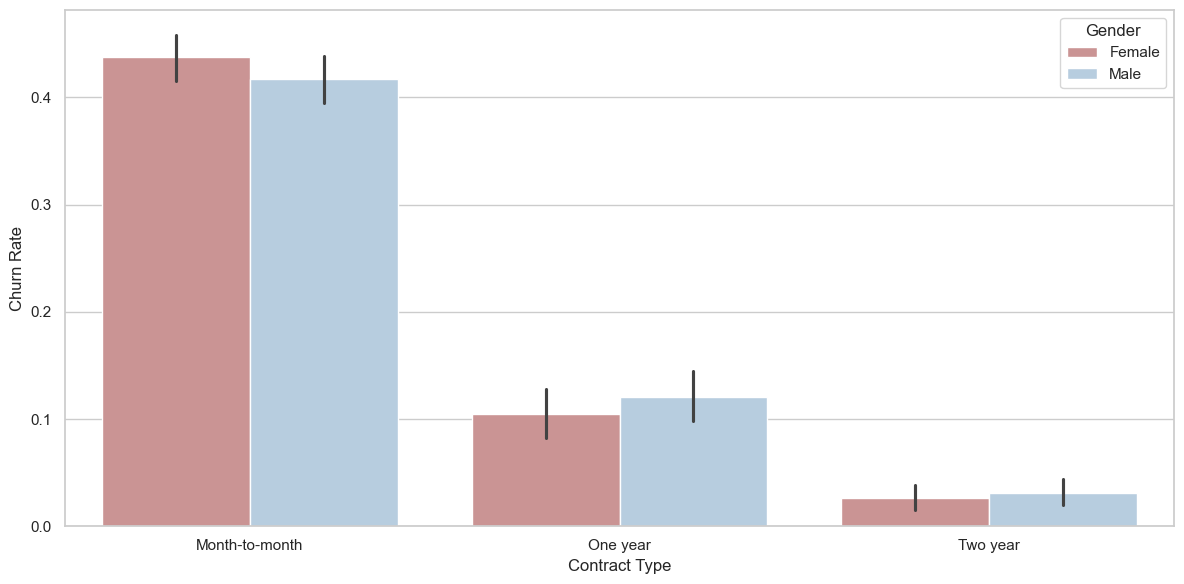

In [548]:
df_plot = df.copy()
 
df_plot['Churn'] = df_plot['Churn'].map({'Yes': 1, 'No': 0})
plt.figure(figsize=(12, 6))
sns.barplot(x='Contract', y='Churn', hue='gender', data=df_plot)
plt.ylabel('Churn Rate')
plt.xlabel('Contract Type')
plt.legend(title='Gender')
plt.tight_layout()
plt.savefig('../plots/churn_by_contract.png')
plt.show()

💡 **Insight**:
- Customers with **month-to-month contracts** have much higher churn rates.
- **Longer-term contracts (1 or 2 years)** reduce churn significantly.
- This suggests that contract length could be a strong retention lever.


## Tenure vs Churn

How long customers have been with the company also likely impacts churn.


In [549]:
df[['tenure', 'Churn']].value_counts().unstack().head(5)


Churn,No,Yes
tenure,,
1,233,380
2,115,123
3,106,94
4,93,83
5,69,64


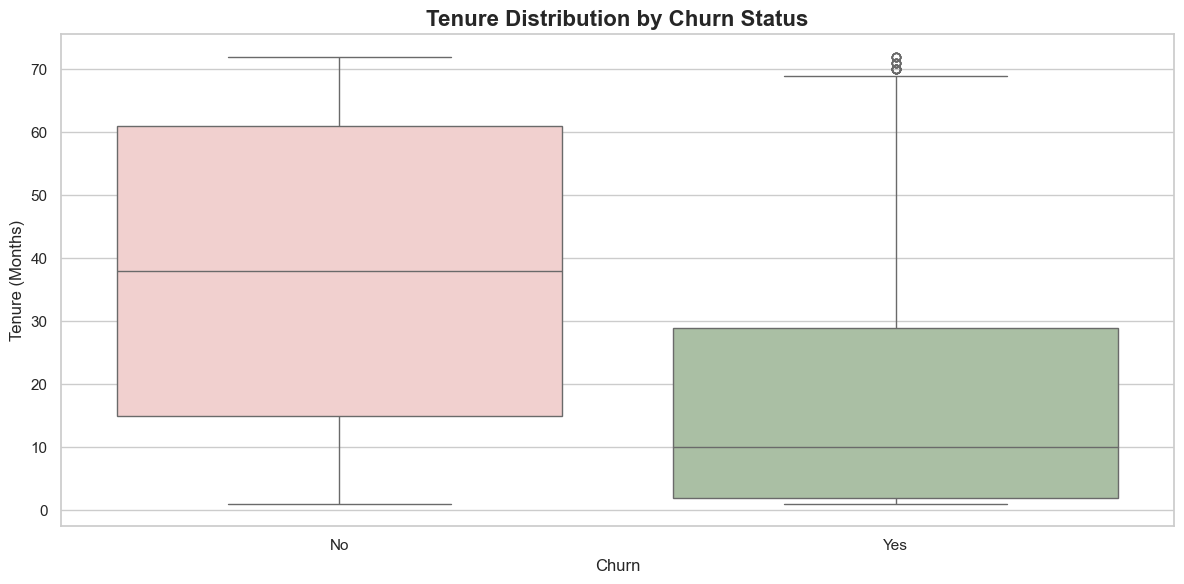

In [561]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='tenure', hue='Churn', data=df, palette=["#f7cac9", "#a8c3a0"])
plt.title('Tenure Distribution by Churn Status', fontsize=16, fontweight='bold')
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')
plt.tight_layout()
plt.savefig('../plots/churn_by_tenure.png')
plt.show()


💡 **Insight**:
- Churning customers tend to have **much shorter tenures**.
- Those who stay beyond the first ~12 months are less likely to churn.


## 💰 Monthly Charges vs Churn

Is there a link between how much a customer pays and their likelihood to churn?


In [551]:
df[['MonthlyCharges', 'Churn']].value_counts().unstack().head(5)


Churn,No,Yes
MonthlyCharges,,
18.25,1.0,NaN
18.40,1.0,NaN
18.55,1.0,NaN
18.70,2.0,NaN
18.75,1.0,NaN


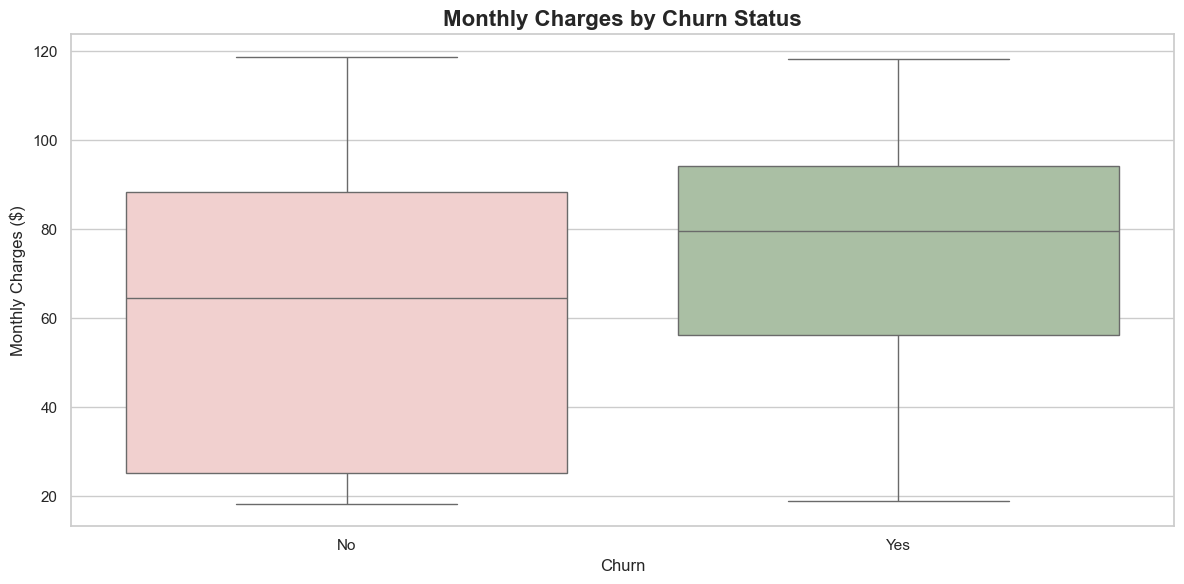

In [559]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', hue='Churn', data=df, palette=["#f7cac9", "#a8c3a0"])
plt.title('Monthly Charges by Churn Status', fontsize=16, fontweight='bold')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges ($)')
plt.tight_layout()
plt.savefig('../plots/churn_by_monthlycharges.png')
plt.show()


💡 **Insight**:
- Customers who churn tend to pay **higher monthly charges**.
- It’s possible that expensive plans lead to dissatisfaction, or are harder to justify.


## Payment Method Distribution by Gender

Which payment methods are preferred by each gender?


In [553]:
df[['PaymentMethod', 'gender']].value_counts().unstack()


gender,Female,Male
PaymentMethod,,
Bank transfer (automatic),787,755
Credit card (automatic),751,770
Electronic check,1170,1195
Mailed check,775,829


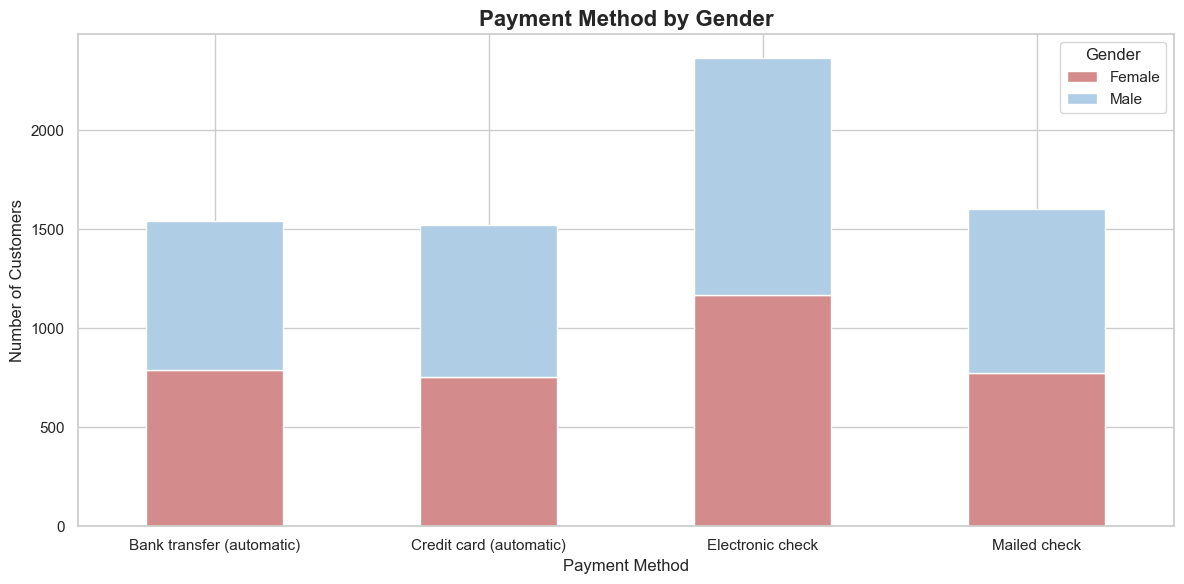

In [554]:
pd.crosstab(df['PaymentMethod'], df['gender']).plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Payment Method by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.tight_layout()
plt.savefig('../plots/payment_by_gender.png')
plt.show()


##  Summary of Key Insights

- **Contract type** has a strong relationship with churn - shorter contracts result in more churn.
- **Shorter tenures** and **higher monthly charges** are associated with higher churn.
- **Gender** appears to have little influence on churn directly.
- **Payment method** preferences vary by gender, but impact on churn is less obvious.



<u>Next step: Feature engineering and model training. </u>
